<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/ale-exp1/cslg_1w_ale_plotting.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

1-way ALE.

> This notebook is for experiment \<ale-exp1\> and data sample \<cslg\>.

### Initialization

In [220]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/pdp-exp1/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Data

In [221]:
sys.path.insert(1, '../../')
import numpy as np, sys, os

sample_name = 'cslg'

f_list = [
    'title', 'abstract', 'venue', 'authors', 
    'year', 
    'n_citations']
ale_xy = {}

def get_quantile_xlabel(quantile):
    step = 1 / len(quantile) * 100 if len(quantile) < 100 else 1
    lb = 0
    new_quantile = []
    limit = 100 if len(quantile) < 100 else len(quantile)
    while lb < limit:
       new_quantile.append(lb) 
       lb += step
    return new_quantile

for f in f_list:
    file = os.path.join('.', 'scores', f'{sample_name}_1w_ale_{f}.npz')
    if os.path.exists(file):
        nparr = np.load(file)
        quantile = nparr['quantile']
        ale_result = nparr['ale_result']
        # print(f, get_quantile_xlabel(quantile))
        
        ale_xy[f] = {
            'x': quantile,
            'y': ale_result,
            'weird': ale_result[len(ale_result) - 1] > 20
        }
        
        if f != 'year' and f != 'n_citations':
            ale_xy[f]['x'] = get_quantile_xlabel(quantile)
            ale_xy[f]['numerical'] = False
        else:
            ale_xy[f]['xticks'] = quantile
            ale_xy[f]['numerical'] = True
               
        # print(len(ale_result))
        

### Ranker

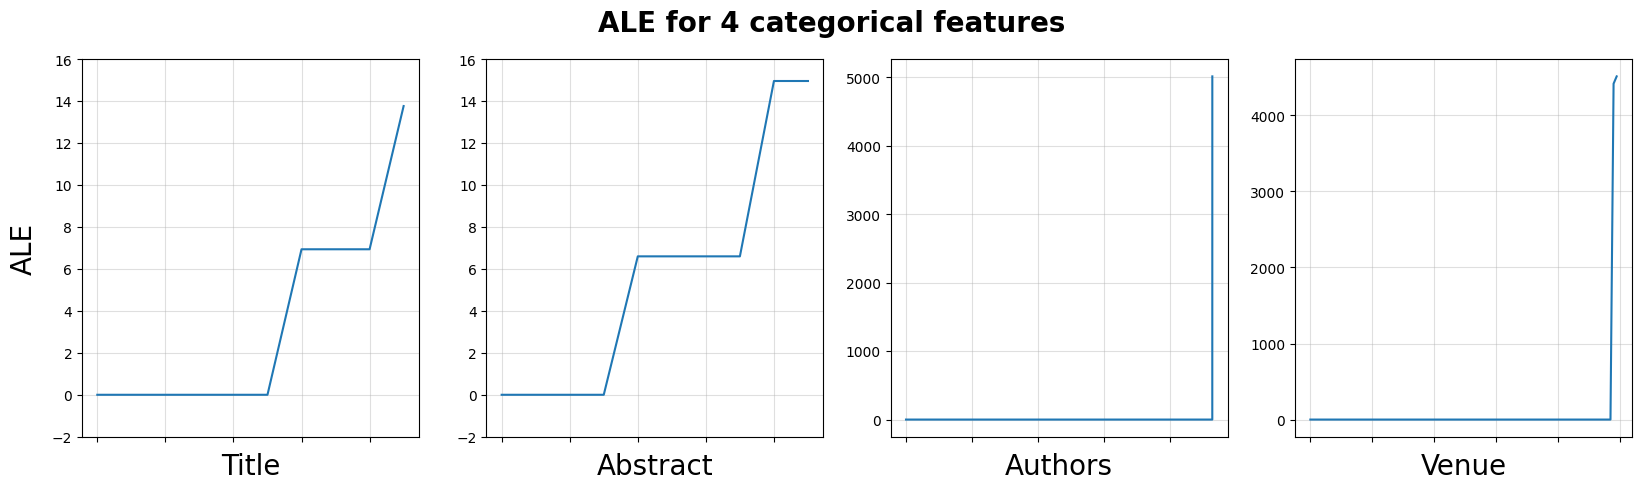

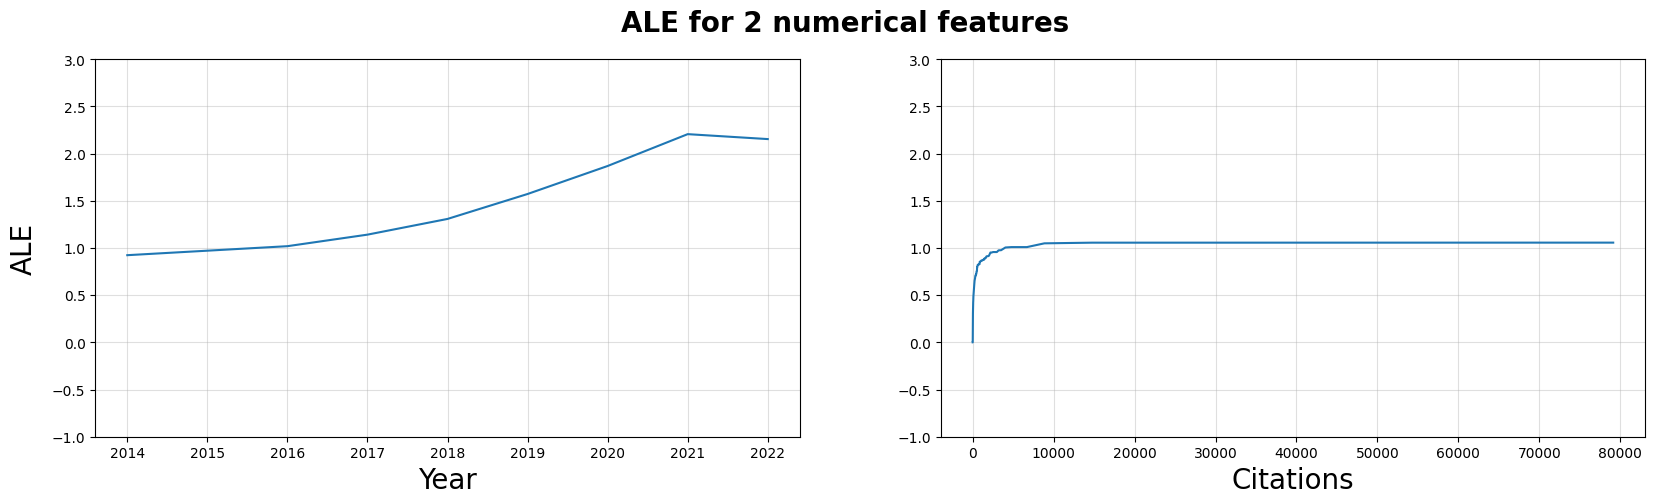

In [222]:
import matplotlib.pyplot as plt

categorical_plot_conf = [
    {
        'xlabel': 'Title',
        'ylabel': 'ALE',
        'ale_xy': ale_xy['title']
    },
    {
        'xlabel': 'Abstract',
        'ale_xy': ale_xy['abstract']
    },    
    {
        'xlabel': 'Authors',
        'ale_xy': ale_xy['authors']
    },    
    {
        'xlabel': 'Venue',
        'ale_xy': ale_xy['venue']
    },
]

numerical_plot_conf = [
    {
        'xlabel': 'Year',
        'ylabel': 'ALE',
        'ale_xy': ale_xy['year']
    },
    {
        'xlabel': 'Citations',
        'ale_xy': ale_xy['n_citations']
    },
]

def pdp_plot(confs, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(confs), figsize=(20, 5), dpi=100)
    subplot_idx = 0
    plt.suptitle(title, fontsize=20, fontweight='bold')
    for conf in confs:
        axess = axes if len(confs) == 1 else axes[subplot_idx]

        axess.plot(conf['ale_xy']['x'], conf['ale_xy']['y'])
        axess.grid(alpha = 0.4)

        # axess.set_ylim([-2, 20])
        
        xAxis = axess.xaxis
        
        axess.set_xlabel(conf['xlabel'], fontsize=20)
        
        if ('ylabel' in conf):
            axess.set_ylabel(conf.get('ylabel'), fontsize=20, labelpad=10)
        
        if ('xticks' not in conf['ale_xy'].keys()):
            xAxis.set_ticklabels([])

        if not (conf['ale_xy']['weird']):
            if (conf['ale_xy']['numerical']):
                axess.set_ylim([-1, 3])
                pass
            else:
                axess.set_ylim([-2, 16])
                
            
        subplot_idx += 1

pdp_plot(categorical_plot_conf, f"ALE for {len(categorical_plot_conf)} categorical features")

pdp_plot(numerical_plot_conf, f"ALE for {len(numerical_plot_conf)} numerical features")

# plt.savefig(os.path.join('.', 'plot', f'{sample_name}-categorical.png'), facecolor='white', transparent=False, bbox_inches='tight')
plt.show()